<a href="https://www.kaggle.com/code/tihomirarmic/car-data-python-project?scriptVersionId=104748434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## READ IN CAR DATA SET AND COLLECT INFO

url = ('../input/cars-2022-dataset/CARS_1.csv') 
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car Name                  203 non-null    object 
 1   Reviews Count             203 non-null    int64  
 2   Fuel Type                 203 non-null    object 
 3   Engine Displacement (cc)  203 non-null    int64  
 4   No. of cylinder           203 non-null    int64  
 5   Seating Capacity          202 non-null    float64
 6   TransmissionType          203 non-null    object 
 7   Fuel Tank Capacity        203 non-null    float64
 8   Body Type                 203 non-null    object 
 9   Rating                    203 non-null    float64
 10  Starting Price            203 non-null    int64  
 11  Ending Price              203 non-null    int64  
 12  Max Torque (Nm)           203 non-null    float64
 13  Max Torque (RPM)          203 non-null    int64  
 14  Max Power 

In [3]:
## OBSERVE FIRST 5 ROWS

print("First 5 rows of data:\n") 
df.head()

First 5 rows of data:



,Car Name,Reviews Count,Fuel Type,Engine Displacement (cc),No. of cylinder,Seating Capacity,TransmissionType,Fuel Tank Capacity,Body Type,Rating,Starting Price,Ending Price,Max Torque (Nm),Max Torque (RPM),Max Power (BHP),Max Power (RPM)
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [4]:
## RENAME 2 COLUMN HEADERS ADDING 'RUPEE'
df.rename(columns={'Starting Price':'Starting Price Rupee', 'Ending Price': 'Ending Price Rupee'}, inplace = True)
df.head(1)

,Car Name,Reviews Count,Fuel Type,Engine Displacement (cc),No. of cylinder,Seating Capacity,TransmissionType,Fuel Tank Capacity,Body Type,Rating,Starting Price Rupee,Ending Price Rupee,Max Torque (Nm),Max Torque (RPM),Max Power (BHP),Max Power (RPM)
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500


In [5]:
## DELETE TWO (NM/BHP) UNNEEDED COLUMNS
df.drop(['Max Torque (Nm)','Max Power (BHP)'], axis = 1, inplace = True)
df.head(1)

,Car Name,Reviews Count,Fuel Type,Engine Displacement (cc),No. of cylinder,Seating Capacity,TransmissionType,Fuel Tank Capacity,Body Type,Rating,Starting Price Rupee,Ending Price Rupee,Max Torque (RPM),Max Power (RPM)
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,3500,5500


In [6]:
##COLLECT DESCRIPIVE STATISTICS
df.describe()

##df.describe(include = 'all')

,Reviews Count,Engine Displacement (cc),No. of cylinder,Seating Capacity,Fuel Tank Capacity,Rating,Starting Price Rupee,Ending Price Rupee,Max Torque (RPM),Max Power (RPM)
count,203.000000,203.000000,203.000000,202.000000,203.000000,203.000000,2.030000e+02,2.030000e+02,203.000000,203.000000
mean,118.684729,2305.921182,4.709360,5.014851,46.143842,4.433498,9.443640e+06,1.112005e+07,3346.507389,4790.147783
std,314.331318,1493.837786,2.538664,1.161050,28.904207,0.280136,1.357035e+07,1.551746e+07,1594.960077,1990.876835
min,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.390000e+05,3.610000e+05,0.000000,0.000000
25%,5.000000,1339.500000,4.000000,5.000000,33.500000,4.500000,9.455000e+05,1.407500e+06,2500.000000,3800.000000
50%,14.000000,1991.000000,4.000000,5.000000,50.000000,4.500000,4.312000e+06,4.600000e+06,3500.000000,5500.000000
75%,83.000000,2996.000000,6.000000,5.000000,66.000000,4.500000,1.160000e+07,1.575000e+07,4500.000000,6000.000000
max,2392.000000,6750.000000,12.000000,8.000000,100.000000,5.000000,7.060000e+07,9.000000e+07,7000.000000,8500.000000


In [7]:
## SPECIFICALLY FIND THE MEAN OF FULE TANK CAPACITY
Fule_Tank_Mean = df['Fuel Tank Capacity'].mean()
print('Fule tank mean value:',Fule_Tank_Mean)

print('\n')

## SPECIFICALLY FIND THE MAX ENGINE DISPLACEMENT
Eng_Disp = df['Engine Displacement (cc)'].max()
print('Max engine displacement:',Eng_Disp )

Fule tank mean value: 46.14384236453202


Max engine displacement: 6750


In [8]:
## CONVERT PRICE FROM RUPEE (INDIA) -> USD
df['Starting Price Rupee'] = df['Starting Price Rupee'] * 0.013
df['Ending Price Rupee'] = df['Ending Price Rupee'] * 0.013
df.head(1)

,Car Name,Reviews Count,Fuel Type,Engine Displacement (cc),No. of cylinder,Seating Capacity,TransmissionType,Fuel Tank Capacity,Body Type,Rating,Starting Price Rupee,Ending Price Rupee,Max Torque (RPM),Max Power (RPM)
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,5187.0,7579.0,3500,5500


In [9]:
#RENAME PRICE RUPEE TO USD $
df.rename(columns={'Starting Price Rupee': 'Starting Price USD', 'Ending Price Rupee': 'Ending Price USD'}, inplace = True)
df.head(1)

,Car Name,Reviews Count,Fuel Type,Engine Displacement (cc),No. of cylinder,Seating Capacity,TransmissionType,Fuel Tank Capacity,Body Type,Rating,Starting Price USD,Ending Price USD,Max Torque (RPM),Max Power (RPM)
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,5187.0,7579.0,3500,5500


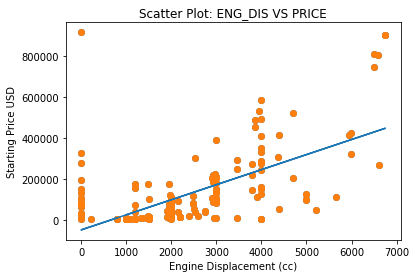

r-value: 0.6224735228749269
p-value: 3.6176591114667963e-23
std_err: 6.519219265747952


In [10]:
# SCATTER PLOT AND R VALUE FOR ENGINE DISPLACEMENT VS STARTING PRICE USD

#DEFINE X AND Y
x = df["Engine Displacement (cc)"]
y = df["Starting Price USD"]

#LABEL PLOT
plt.scatter(x,y)
plt.title("Scatter Plot: ENG_DIS VS PRICE")
plt.xlabel("Engine Displacement (cc)")
plt.ylabel("Starting Price USD")

#CREATE FUNCTION
def myfunc(x):
  return slope * x + intercept

slope, intercept, r, p, std_err = stats.linregress(x, y)

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)

plt.show()

print('r-value:', r) 
print('p-value:', p)
print('std_err:', std_err)

#RELATIONSHIP IS POSITIVELY CORR (R = 0.62), AND HIGH CERTAINTY (P = 3.61e-23), HOWEVER THERE ARE SOME OUTLIERS THAT COULD BE LOOKED AT.

